In [1]:
import chromadb
from chromadb.utils import embedding_functions
import embedClustering
import numpy as np
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
CHROMA_DATA_PATH = "chroma_data/"
EMBED_MODEL = "distiluse-base-multilingual-cased-v1"
COLLECTION_NAME = "WW2-Languages-Wiki"

client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

In [5]:
embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name=EMBED_MODEL,
    device="mps"
)

In [6]:
collection = client.get_collection(COLLECTION_NAME, embedding_function=embedding_func)

In [7]:
collection.peek(1)

{'ids': ['id0'],
 'embeddings': [[0.027346588671207428,
   -0.049121707677841187,
   -0.06052326038479805,
   0.021187398582696915,
   -0.09249996393918991,
   -0.015620296820998192,
   0.02335466258227825,
   -0.036205362528562546,
   -0.020064063370227814,
   -0.013469664379954338,
   -0.015714524313807487,
   -0.0011286346707493067,
   -0.02886279672384262,
   0.01664876565337181,
   0.09986474364995956,
   0.03526124730706215,
   0.017452366650104523,
   -0.10059753060340881,
   -0.01447143591940403,
   0.00974336825311184,
   -0.008981304243206978,
   0.03403535112738609,
   0.055465854704380035,
   0.044259168207645416,
   0.010911666788160801,
   -0.038738563656806946,
   0.014996207319200039,
   0.05485611781477928,
   0.010830024257302284,
   -0.006254417356103659,
   0.012387121096253395,
   0.07539049535989761,
   0.00916977133601904,
   -0.008955545723438263,
   -0.024492206051945686,
   -0.048841554671525955,
   0.01036826055496931,
   0.020321711897850037,
   0.0080883773

In [8]:
query_results = collection.query(
    query_texts=["The End"],
    n_results=5
)
query_results

{'ids': [['id9910', 'id9920', 'id17580', 'id9936', 'id17021']],
 'distances': [[0.8069530129432678,
   0.8069530129432678,
   0.8069530129432678,
   0.8069531321525574,
   0.8069531321525574]],
 'metadatas': [[{'language': 'km'},
   {'language': 'km'},
   {'language': 'blk'},
   {'language': 'km'},
   {'language': 'ckb'}]],
 'embeddings': None,
 'documents': [['កិច្ចធុរៈនិងកិច្ចព្រមព្រៀងនៅអឺរ៉ុប',
   'ព្រឹត្តិការណ៍មុនសង្គ្រាម',
   'စဲ့ꩻပွယ်ꩻထွာလွဉ်ဗာႏအခရာႏ',
   'កាលប្បវត្តិ',
   'سەرچاوەکان']],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

In [9]:
embeddings = np.array(collection.get(include=['embeddings'])['embeddings'])
len(embeddings), len(embeddings[0])

(19430, 512)

In [10]:
documents = np.array(collection.get(include=['documents'])['documents'])

In [11]:
reduced_embeddings = embedClustering.tsneReduceEMB(embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [12]:
k_nearest_neighbors = 3

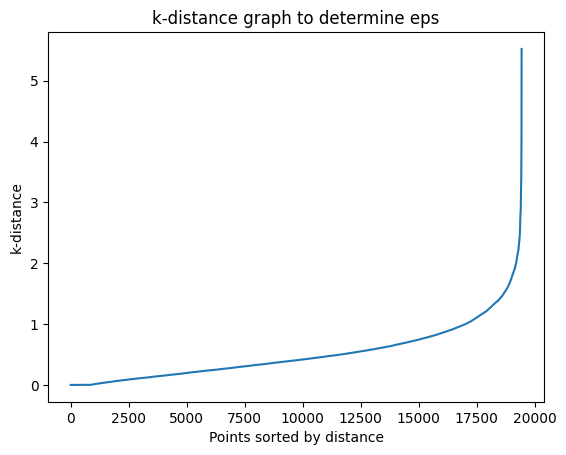

3.249264136981643

In [13]:
optimal_eps = embedClustering.findEPS(reduced_embeddings, k=k_nearest_neighbors)
optimal_eps

In [15]:
labels = embedClustering.hdbscanEMB(reduced_embeddings, min_samples=k_nearest_neighbors)

Estimated number of clusters: 1495
Estimated number of noise points: 4006


In [20]:
labels = embedClustering.dbscanEMB(reduced_embeddings, eps=2.74, min_samples=k_nearest_neighbors)

Estimated number of clusters: 32
Estimated number of noise points: 43


In [16]:
fig = embedClustering.plot_clusters(reduced_embeddings, documents, labels)

In [25]:
fig.write_image("./exportClusters/cluster1.png")
fig.write_html("./exportClusters/interactive_plot1.html")
